# Summary


### 1. We expect yield data to have one yield per org, year, field
We expect there to be one measure of area (acreage) per field
If there are problems, what’s the extent? How would you summarize this for our Customer Success or Product teams?

>Assuming "yield" refers to crop type, of which there are two in the dataset (corn and soybean), and not harvest product, of which there is only one (grain)--the data contains multiple yields per org, year and field. The dataset has the same org growing 2 types of yields in the same year on multiple different fields. There are also fields growing multiple yields in the same year from different growers. Overall, there are many different values pointing to the same source which need to be dealt with as discrepencies. **The expectation is in general confusing. 

>For the requirement of one measure of area per field, the dataset also contains multiple entries per field. There are only 270 unique entries for field_id and therefore there are 147 entries that are duplicate measurements. Some fields have multiple measurements (up to 9 per field) that vary greatly in acreage (e.g. 142 to 532) indicating an issue with way the data is collected or the fields are measured (unless field sizes are changing every year?). 




### 2. Examine crop yield/harvest data quality
Acknowledging that you may not have in-depth subject knowledge in agriculture, looking at the data provided how would you define data quality in this case?

>Overall quality of the dataset is moderate. 

>Negatives:

>The data entries are inconsistent and not unique based on the fact that there are multiple entries of information for any given feature. The expectations of validity and accuracy are not met because data is all over the place for yield and the dataset contains more than one measure of area per field. Therefore the usability of the dataset is low and requires additional cleaning to be understandable and relevant. 

>Positives:

>The dataset does not have any missing values, so at least the dataset is complete. Also there aren't entire row-based duplicates. The number of entries per year, org and other overlapping columns in the 3 datasets all match (e.g. 142 entries for org_id in yields, orgs and fields). Data conforms to the correct syntax of its definition (string, integer, float). 


In [10]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


yields = pd.read_csv('toy_yields.csv')
orgs = pd.read_csv('toy_orgs.csv')
fields = pd.read_csv('toy_fields.csv')


In [11]:
print (yields.shape)
yields.head(5)

#We expect yield data to have one yield per org, year, field

(417, 7)


,crop_type,year,harvest_product,total_harvested,harvested_unit,field_id,org_id
0,CROP.CORN.COMMERCIAL,2016,grain,53290.62885,bu,cb1e3bd821dd673a0c378b16ba97075919aa993a,0966e34316e39217e4f26fbe20fc14e24c26567b
1,CROP.CORN.COMMERCIAL,2014,grain,40073.82155,bu,58d04a7094c1b08e9856932a02104d2a36b7b8ce,726cce9d9800d792d1e0fbb83923ac4c6be4f668
2,CROP.CORN.COMMERCIAL,2015,grain,45528.03394,bu,5e3babe7b318f4245ceb16718665af0b54335443,598d17ec200eeb9e27ae829746ccf47c57761bc1
3,CROP.SOYBEAN.COMMERCIAL,2015,grain,13927.33228,bu,02dc3fe6f889f3ece8daf456d26464d381bc9e55,fe62dee029474d52346542845674529025594056
4,CROP.CORN.COMMERCIAL,2014,grain,59676.63487,bu,109e500b323e0ef7baadd4409830c7619d8cfbfa,fe62dee029474d52346542845674529025594056


In [21]:
print (orgs.shape)
orgs.head(5)

orgs = orgs.rename(columns = {'organization_id': 'org_id'})


(21, 2)


In [27]:
yields_orgs = pd.merge(left=yields, right=orgs, how='inner')

yields_orgs = yields_orgs[['crop_type','year','grower','org_id','field_id','harvest_product','total_harvested','harvested_unit']]
yields_orgs.head(50)

,crop_type,year,grower,org_id,field_id,harvest_product,total_harvested,harvested_unit
0,CROP.CORN.COMMERCIAL,2016,Austin Farm,0966e34316e39217e4f26fbe20fc14e24c26567b,cb1e3bd821dd673a0c378b16ba97075919aa993a,grain,53290.628850,bu
1,CROP.SOYBEAN.COMMERCIAL,2015,Austin Farm,0966e34316e39217e4f26fbe20fc14e24c26567b,0c090e104b85e5d305640f9d43f32d0a8c5faeb6,grain,403.185902,bu
2,CROP.SOYBEAN.COMMERCIAL,2015,Austin Farm,0966e34316e39217e4f26fbe20fc14e24c26567b,cb1e3bd821dd673a0c378b16ba97075919aa993a,grain,27620.687600,bu
3,CROP.CORN.COMMERCIAL,2015,Austin Farm,0966e34316e39217e4f26fbe20fc14e24c26567b,82de9e36652993a37ce5fbc55fa9033f425fb120,grain,41322.024800,bu
4,CROP.SOYBEAN.COMMERCIAL,2015,Austin Farm,0966e34316e39217e4f26fbe20fc14e24c26567b,3043cfa778d98f7970918f0f2958c4b6e9701c7d,grain,13638.816380,bu
5,CROP.CORN.COMMERCIAL,2015,Austin Farm,0966e34316e39217e4f26fbe20fc14e24c26567b,5ffe5f7993c967a9ec145605bb6bd6597f03b5e2,grain,48335.168470,bu
6,CROP.CORN.COMMERCIAL,2015,Austin Farm,0966e34316e39217e4f26fbe20fc14e24c26567b,bed20ae41d9cc29734331ee52d0d94c884dc0caf,grain,102959.162400,bu
7,CROP.CORN.COMMERCIAL,2016,Austin Farm,0966e34316e39217e4f26fbe20fc14e24c26567b,66dec081f750e2d33394a88a4436242bfbdcf6da,grain,127701.071100,bu
8,CROP.CORN.COMMERCIAL,2015,Austin Farm,0966e34316e39217e4f26fbe20fc14e24c26567b,6444e5cd8df1b4a6d3eeb968a30822e3e486bfaa,grain,39666.216620,bu
9,CROP.SOYBEAN.COMMERCIAL,2015,Austin Farm,0966e34316e39217e4f26fbe20fc14e24c26567b,5f826cc116841bfdbca273cebb21f470e602c75f,grain,27107.456680,bu


In [86]:
print (yields_orgs.isnull().values.any())
print (yields_orgs.duplicated().values.any())

print (yields_orgs['crop_type'].value_counts())
print (yields_orgs['harvest_product'].value_counts())
print (yields_orgs['year'].value_counts())
print (yields_orgs['grower'].value_counts())

print (yields_orgs['grower'].nunique())



False
False
CROP.CORN.COMMERCIAL       287
CROP.SOYBEAN.COMMERCIAL    130
Name: crop_type, dtype: int64
grain    417
Name: harvest_product, dtype: int64
2015    183
2017    107
2016     90
2014     37
Name: year, dtype: int64
Simmons Farm        148
Cavanaugh Farm       82
Dudley Farm          51
Austin Farm          50
Depner Farm          34
Konecny Farm          8
Jenkins Farm          7
Odell Farm            6
Hawker Farm           5
Ross Farm             4
Gregory Farm          4
Flanagan Farm         3
Overholt Farm         3
Sifuentes Farm        2
Barrocas Farm         2
Mull Farm             2
Seever Farm           2
Carpentieri Farm      1
Stinson Farm          1
Crawford Farm         1
Batte Farm            1
Name: grower, dtype: int64
21


In [71]:
group_type = yields_orgs.groupby(['crop_type','year','grower','field_id']).count()

group

org_id  \
crop_type               year grower         field_id                                           
CROP.CORN.COMMERCIAL    2014 Cavanaugh Farm 09851853e7cd4d6ae686cd549847e9a039d2c91b       1   
                                            109e500b323e0ef7baadd4409830c7619d8cfbfa       1   
                                            2d1acb1174d8088876fb72e0a12a0781cab7d479       1   
                                            c76cbddf578b63db97af9721a831b30f2d73db18       1   
                                            fb61c1795ca1134a7e2e5a365928075153bc39f7       1   
                             Depner Farm    42045c558e5ea60a894fd5fbf53479add8bca18d       1   
                                            4f066ef6d07405fb98f7c15a1d8a080013863a9f       1   
                                            7918c722bf8c5bf47d3f06ab61ee7f16c90a2887       1   
                                            8e17580ff2a3fba21f19d533a34aa4b1ae628ee3       1   
                                            a1b95c0d5d12da17a82e1af370743f9b174574e0       1   
                                            aaeab87381522227199fe3d1a71e0741826abad2       1   
                                            f60d9d8c5f2af39bb4bfac7cb1f435989e6d84ce       1   
                             Dudley Farm    0f6fc21fe4ea2504732646df3412362a0c3440e1       1   
                                            3b8ad599ef4028a067f4e67b3a649cc226e1a776       1   
                                            55ecf1d7f43b08670298ae01a75d32b5bc4457bd       1   
                                            58d04a7094c1b08e9856932a02104d2a36b7b8ce       1   
                                            62028aeefb81fdd399103823356c3f90fd3912ba       1   
                                            8ba906706d40e0a9388e9300c896213b17c07fe1       1   
                                            a12eb00a8434d1f2f0f5819c2c644fa09793a333       1   
                                            c81eabfac15c03c8867033b500b510272b22d621       1   
                                            f06c46fe892d3c5b6857fedb2e2d98404a7acbaf       1   
                             Odell Farm     0693c33638945a4ca51cc19c1bbc2adba2bd9dfc       1   
                                            0fb5444d94284696e133f8da830f054d6e9c7ea2       1   
                                            c0bc76afd8a68866cbacda59ff3ef73f06eaf480       1   
                        2015 Austin Farm    0dd926eb22935abce9d072635fa3301d11ca51ad       1   
                                            0ed36c4cebc9422c09599331d19995cf6410b513       1   
                                            1a49329d95f4212cad1465abd97fe2b02b2d4e59       1   
                                            3a7239737a3e4fd938314ee0546579a2071e0283       1   
                                            3ecb07dfe2886a452d827ba5be310bef04548353       1   
                                            5ffe5f7993c967a9ec145605bb6bd6597f03b5e2       1   
...                                                                                      ...   
CROP.SOYBEAN.COMMERCIAL 2017 Cavanaugh Farm e43e639b2f5771063d245e90900301ac1b8b9167       1   
                             Konecny Farm   05c019814ed3ff2c61eb97e267543564d23dd557       1   
                                            841273e6e5fc30584ce347b7a4769e62bacab800       1   
                                            d4570d50d512deca12db0b1369a236a4b9a49bb4       1   
                             Ross Farm      a2dcde23ea04f59059d34bd0ce99de6d03e5028a       1   
                                            ead54fc4085fba5da57ad64a34e8456d84ce1020       1   
                             Sifuentes Farm b712ac1d4550a50dba54876abbfa22112c7e67fa       1   
                             Simmons Farm   1769af5e396f1785e66f980a5bc21a4cd81e25f4       1   
                                            1803ba0ed01199014be611b89db142bf988b78c3       1   
                                            32feca2bc2

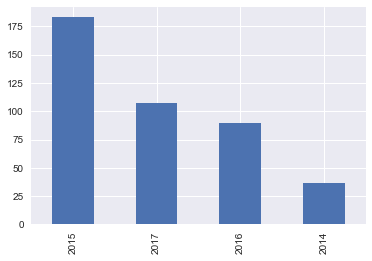

In [65]:
import seaborn as sns
sns.set()

yields_orgs.year.value_counts().plot(kind='bar')

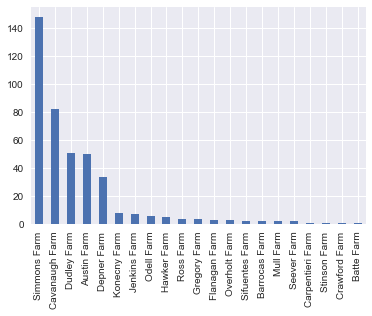

In [66]:
yields_orgs.grower.value_counts().plot(kind='bar')

In [30]:
fields.head(5)

#We expect there to be one measure of area (acreage) per field

,field_id,org_id,year,field_area,field_area_unit
0,cb1e3bd821dd673a0c378b16ba97075919aa993a,0966e34316e39217e4f26fbe20fc14e24c26567b,2016,307.185719,acre
1,58d04a7094c1b08e9856932a02104d2a36b7b8ce,726cce9d9800d792d1e0fbb83923ac4c6be4f668,2014,213.680671,acre
2,5e3babe7b318f4245ceb16718665af0b54335443,598d17ec200eeb9e27ae829746ccf47c57761bc1,2015,160.063342,acre
3,02dc3fe6f889f3ece8daf456d26464d381bc9e55,fe62dee029474d52346542845674529025594056,2015,194.621312,acre
4,109e500b323e0ef7baadd4409830c7619d8cfbfa,fe62dee029474d52346542845674529025594056,2014,269.088511,acre


In [85]:
print (fields['field_id'].nunique())

print (fields.shape)

print (fields.isnull().values.any())

fields.head()


270
(417, 6)
False


,field_id,field_area,year,field_area_unit,org_id,columns
0,cb1e3bd821dd673a0c378b16ba97075919aa993a,307.185719,2016,acre,0966e34316e39217e4f26fbe20fc14e24c26567b,0
1,58d04a7094c1b08e9856932a02104d2a36b7b8ce,213.680671,2014,acre,726cce9d9800d792d1e0fbb83923ac4c6be4f668,0
2,5e3babe7b318f4245ceb16718665af0b54335443,160.063342,2015,acre,598d17ec200eeb9e27ae829746ccf47c57761bc1,0
3,02dc3fe6f889f3ece8daf456d26464d381bc9e55,194.621312,2015,acre,fe62dee029474d52346542845674529025594056,0
4,109e500b323e0ef7baadd4409830c7619d8cfbfa,269.088511,2014,acre,fe62dee029474d52346542845674529025594056,0


In [74]:
group_field = yields_orgs.groupby(['field_id', 'grower','crop_type','year']).count()
group_field

org_id  \
field_id                                 grower         crop_type               year           
00ed44d041d6b0f8a538b2815fdb34b2dcee329c Simmons Farm   CROP.CORN.COMMERCIAL    2015       1   
                                                                                2017       1   
                                                        CROP.SOYBEAN.COMMERCIAL 2016       1   
02dc3fe6f889f3ece8daf456d26464d381bc9e55 Cavanaugh Farm CROP.SOYBEAN.COMMERCIAL 2015       1   
03074faf1987f5325db3e511880d28a582293c64 Cavanaugh Farm CROP.SOYBEAN.COMMERCIAL 2017       1   
04aa2c573e5e029dc25c2a5ed84df869f5ef7ec6 Depner Farm    CROP.CORN.COMMERCIAL    2015       1   
                                                                                2016       1   
0540bd0e53dbd83c74197f7419c398f4bc110170 Barrocas Farm  CROP.CORN.COMMERCIAL    2017       1   
05c019814ed3ff2c61eb97e267543564d23dd557 Konecny Farm   CROP.SOYBEAN.COMMERCIAL 2017       1   
0693c33638945a4ca51cc19c1bbc2adba2bd9dfc Odell Farm     CROP.CORN.COMMERCIAL    2014       1   
075041a114b9768612d10b7ea78b3d8cba71521c Simmons Farm   CROP.CORN.COMMERCIAL    2016       1   
                                                                                2017       1   
                                                        CROP.SOYBEAN.COMMERCIAL 2015       1   
07a673326823d0b81a940c4b555622f149451e75 Simmons Farm   CROP.CORN.COMMERCIAL    2015       1   
09851853e7cd4d6ae686cd549847e9a039d2c91b Cavanaugh Farm CROP.CORN.COMMERCIAL    2014       1   
0c090e104b85e5d305640f9d43f32d0a8c5faeb6 Austin Farm    CROP.SOYBEAN.COMMERCIAL 2015       1   
0cc1b0a8c09d8bb4ba14b926e63e5ad590c159b4 Simmons Farm   CROP.CORN.COMMERCIAL    2015       1   
                                                                                2016       1   
                                                                                2017       1   
0d6715908b7df72d546bcc6ebf5fd54fe8a9b958 Flanagan Farm  CROP.SOYBEAN.COMMERCIAL 2015       1   
0dcbc52dfc51b62c4794c9c53d65a3f751bb9081 Dudley Farm    CROP.CORN.COMMERCIAL    2015       1   
0dd926eb22935abce9d072635fa3301d11ca51ad Austin Farm    CROP.CORN.COMMERCIAL    2015       1   
0ed36c4cebc9422c09599331d19995cf6410b513 Austin Farm    CROP.CORN.COMMERCIAL    2015       1   
0f6fc21fe4ea2504732646df3412362a0c3440e1 Dudley Farm    CROP.CORN.COMMERCIAL    2014       1   
                                                                                2015       1   
0fb5444d94284696e133f8da830f054d6e9c7ea2 Odell Farm     CROP.CORN.COMMERCIAL    2014       1   
109e500b323e0ef7baadd4409830c7619d8cfbfa Cavanaugh Farm CROP.CORN.COMMERCIAL    2014       1   
11ae1790351279c8c04f3d2d7f0331872814a0a3 Dudley Farm    CROP.CORN.COMMERCIAL    2015       1   
12c6fc06c99a462375eeb3f43dfd832b08ca9e17 Cavanaugh Farm CROP.SOYBEAN.COMMERCIAL 2017       1   
12e8e0ba6375b5cf8ab231802411666c0c55a150 Dudley Farm    CROP.SOYBEAN.COMMERCIAL 2014       1   
...                                                                                      ...   
ed892798892fbc43f7241677dfd67bd1d1441ad8 Austin Farm    CROP.CORN.COMMERCIAL    2015       1   
edc2c9424c71ce5c17039db8b06a8c1bb0f72026 Depner Farm    CROP.SOYBEAN.COMMERCIAL 2015       1   
efc62bd0e34322ab7dcd0a67f1577f2c55752da7 Cavanaugh Farm CROP.SOYBEAN.COMMERCIAL 2016       1   
efefc9519f82ea868be1741749c399d235d34c2c Dudley Farm    CROP.SOYBEAN.COMMERCIAL 2014       1   
                                                                                2015       1   
f00ee652e072f384295e0c613eae882e2b075768 Jenkins Farm   CROP.CORN.COMMERCIAL    2016       1   
f06c46fe892d3c5b6857fedb2e2d98404a7acbaf Dudley Farm    CROP.CORN.COMMERCIAL    2014       1   
                                                                                2015       1   
f0cf77d67eafd85e0f9bdbbf7887c927dd09f75d Simmons Farm   CROP.CORN.COMMERCIAL    2015       1   
                                                      

In [78]:
fields = fields [['field_id','field_area','year','field_area_unit','org_id']]

fields['columns'] = fields.groupby('field_id')['field_area'].cumcount()
grouped = fields.pivot(index='field_id', columns='columns')

grouped.head(10)

field_area                          \
columns                                           0           1           2    
field_id                                                                       
00ed44d041d6b0f8a538b2815fdb34b2dcee329c  548.764229  298.069184  367.176503   
02dc3fe6f889f3ece8daf456d26464d381bc9e55  194.621312         NaN         NaN   
03074faf1987f5325db3e511880d28a582293c64  190.517286         NaN         NaN   
04aa2c573e5e029dc25c2a5ed84df869f5ef7ec6  202.071990  262.762377         NaN   
0540bd0e53dbd83c74197f7419c398f4bc110170  356.012493         NaN         NaN   
05c019814ed3ff2c61eb97e267543564d23dd557  412.545361         NaN         NaN   
0693c33638945a4ca51cc19c1bbc2adba2bd9dfc  221.523335         NaN         NaN   
075041a114b9768612d10b7ea78b3d8cba71521c  196.393965  344.586665  521.341796   
07a673326823d0b81a940c4b555622f149451e75  298.689045         NaN         NaN   
09851853e7cd4d6ae686cd549847e9a039d2c91b  267.181237         NaN         NaN   

                                                                      ...   \
columns                                   3   4   5   6   7   8   9   ...    
field_id                                                              ...    
00ed44d041d6b0f8a538b2815fdb34b2dcee329c NaN NaN NaN NaN NaN NaN NaN  ...    
02dc3fe6f889f3ece8daf456d26464d381bc9e55 NaN NaN NaN NaN NaN NaN NaN  ...    
03074faf1987f5325db3e511880d28a582293c64 NaN NaN NaN NaN NaN NaN NaN  ...    
04aa2c573e5e029dc25c2a5ed84df869f5ef7ec6 NaN NaN NaN NaN NaN NaN NaN  ...    
0540bd0e53dbd83c74197f7419c398f4bc110170 NaN NaN NaN NaN NaN NaN NaN  ...    
05c019814ed3ff2c61eb97e267543564d23dd557 NaN NaN NaN NaN NaN NaN NaN  ...    
0693c33638945a4ca51cc19c1bbc2adba2bd9dfc NaN NaN NaN NaN NaN NaN NaN  ...    
075041a114b9768612d10b7ea78b3d8cba71521c NaN NaN NaN NaN NaN NaN NaN  ...    
07a673326823d0b81a940c4b555622f149451e75 NaN NaN NaN NaN NaN NaN NaN  ...    
09851853e7cd4d6ae686cd549847e9a039d2c91b NaN NaN NaN NaN NaN NaN NaN  ...    

                                         org_id                                \
columns                                      11    12    13    14    15    16   
field_id                                                                        
00ed44d041d6b0f8a538b2815fdb34b2dcee329c   None  None  None  None  None  None   
02dc3fe6f889f3ece8daf456d26464d381bc9e55   None  None  None  None  None  None   
03074faf1987f5325db3e511880d28a582293c64   None  None  None  None  None  None   
04aa2c573e5e029dc25c2a5ed84df869f5ef7ec6   None  None  None  None  None  None   
0540bd0e53dbd83c74197f7419c398f4bc110170   None  None  None  None  None  None   
05c019814ed3ff2c61eb97e267543564d23dd557   None  None  None  None  None  None   
0693c33638945a4ca51cc19c1bbc2adba2bd9dfc   None  None  None  None  None  None   
075041a114b9768612d10b7ea78b3d8cba71521c   None  None  None  None  None  None   
07a673326823d0b81a940c4b555622f149451e75   None  None  None  None  None  None   
09851853e7cd4d6ae686cd549847e9a039d2c91b   None  None  None  None  None  None   

                                                                  
columns                                     17    18    19    20  
field_id                                                          
00ed44d041d6b0f8a538b2815fdb34b2dcee329c  None  None  None  None  
02dc3fe6f889f3ece8daf456d26464d381bc9e55  None  None  None  None  
03074faf1987f5325db3e511880d28a582293c64  None  None  None  None  
04aa2c573e5e029dc25c2a5ed84df869f5ef7ec6  None  None  None  None  
0540bd0e53dbd83c74197f7419c398f4bc110170  None  None  None  None  
05c019814ed3ff2c61eb97e267543564d23dd557  None  None  None  None  
0693c33638945a4ca51cc19c1bbc2adba2bd9dfc  None  None  None  None  
075041a114b9768612d10b7ea78b3d8cba71521c  None  None  None  None  
07a673326823d0b81a940c4b555622f149451e75  None  None  None  None  
09851853e7cd4d6ae686cd549847e9a039d2c91b  None  None  None  None  

[10 rows x 84 columns]

In [84]:
fields.describe()

print (fields['org_id'].value_counts())

598d17ec200eeb9e27ae829746ccf47c57761bc1    148
fe62dee029474d52346542845674529025594056     82
726cce9d9800d792d1e0fbb83923ac4c6be4f668     51
0966e34316e39217e4f26fbe20fc14e24c26567b     50
106e6791d0f181b391cde800e74fdc14d529dc0a     34
2498aa02bfe5084932147db868715faf88ffcb41      8
462c9ed4acd1c1b5ec3b130f3101b54cd5a66bfb      7
ced5d63baaa0323be6503a0fa952c684ddce8745      6
b3bd5efa1dbecf1a1a564b8bc6303c4a2c162fb1      5
1d427ae4148dfebbd56f904a0de246fd89712cf0      4
2a7365d841e79f504f0c5c55267a87f501e4d1e4      4
dcf70d3a931a836d948e93429eb7dd4a9c9c718e      3
bb2187d34c27359e4e0c513ba47b0451c42907e9      3
564e50b68ab1574426851440c6e42ae5022a5a74      2
7853306a8cfa951541aef8f4f8374ad845894a4a      2
485482977cd1d502b0b51d03d22710ae857ba701      2
2ec53b20e3a9f6ff73d290ef3e8e8f30a2a30235      2
513612757cd6094d98b6a82a01d6f115fe9ae88c      1
7bdbf21b670c1107e808b2eb2032c11e69696e6b      1
9f82bb949b4be165331106bfed87ea4f1e44fcd8      1
2a880f4ff3ae665353219c9a52f4e982cdb433e2